In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

datadict = unpickle("cifar-10-batches-py\data_batch_1")
X = datadict[b'data']
Y = datadict[b'labels']

Label counts: {np.int64(0): np.int64(5000), np.int64(1): np.int64(5000), np.int64(2): np.int64(5000), np.int64(3): np.int64(5000), np.int64(4): np.int64(5000), np.int64(5): np.int64(5000), np.int64(6): np.int64(5000), np.int64(7): np.int64(5000), np.int64(8): np.int64(5000), np.int64(9): np.int64(5000)}


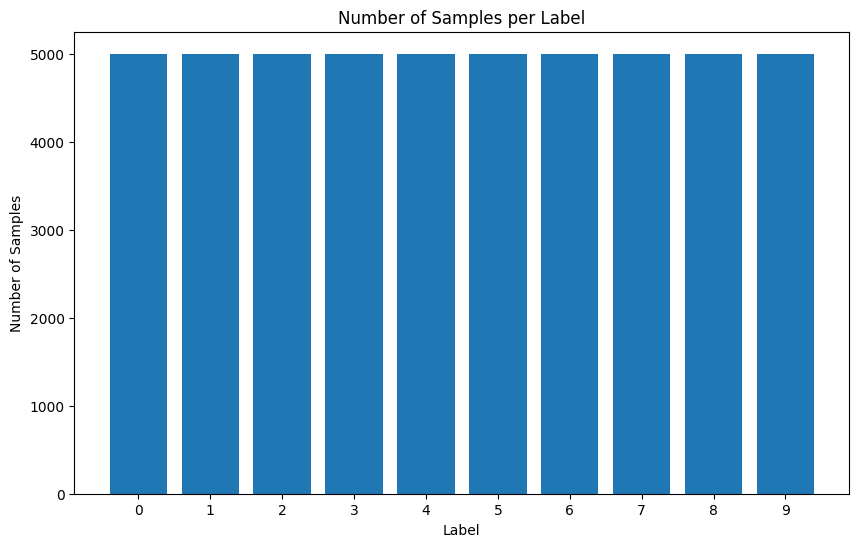

In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

def load_labels_from_batches(batch_files):
    all_labels = []
    for batch_file in batch_files:
        datadict = unpickle(batch_file)
        labels = datadict[b'labels']
        all_labels.extend(labels)
    return np.array(all_labels)

# 設置所有批次文件名
batch_files = [
    "cifar-10-batches-py/data_batch_1",
    "cifar-10-batches-py/data_batch_2",
    "cifar-10-batches-py/data_batch_3",
    "cifar-10-batches-py/data_batch_4",
    "cifar-10-batches-py/data_batch_5"
]

# 讀取所有批次的標籤
all_labels = load_labels_from_batches(batch_files)

# 計算每個標籤的筆數
unique, counts = np.unique(all_labels, return_counts=True)
label_counts = dict(zip(unique, counts))

# 打印每個標籤及其對應的數量
print("Label counts:", label_counts)

# 繪製直方圖
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Label')
plt.xticks(ticks=list(label_counts.keys()))  # 設置x軸刻度為標籤
plt.show()

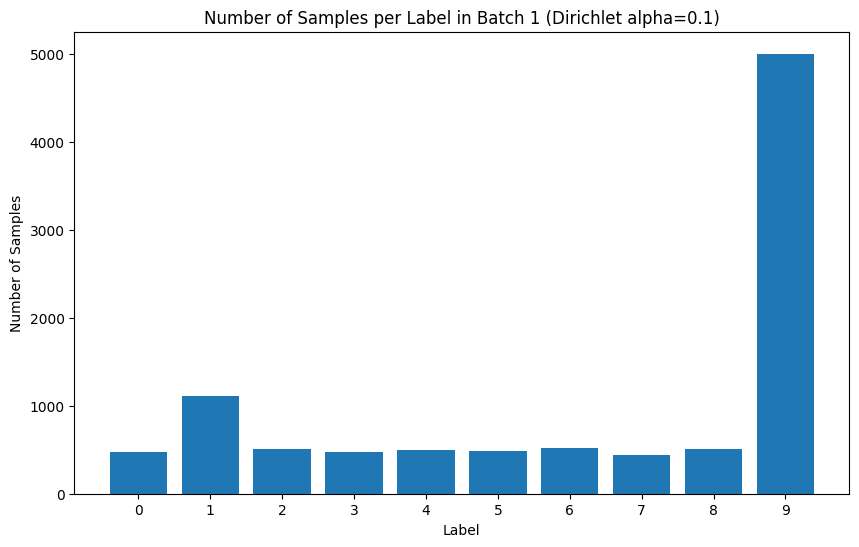

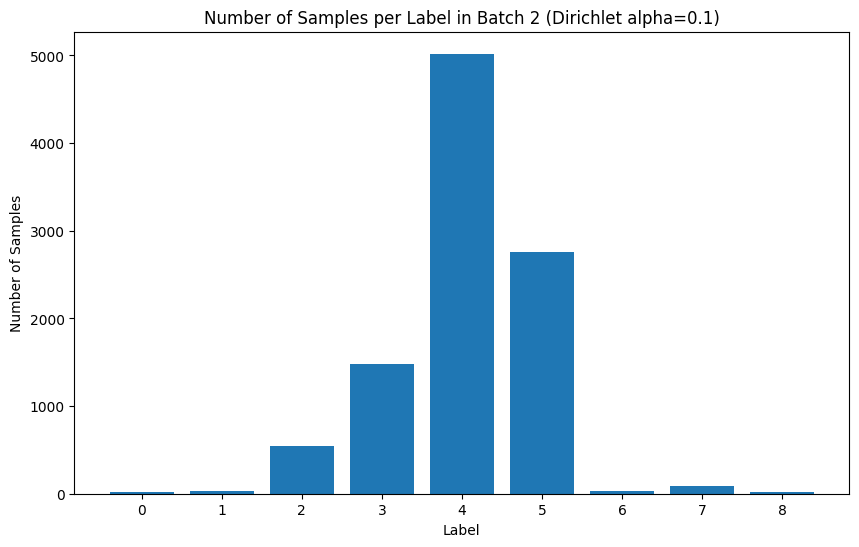

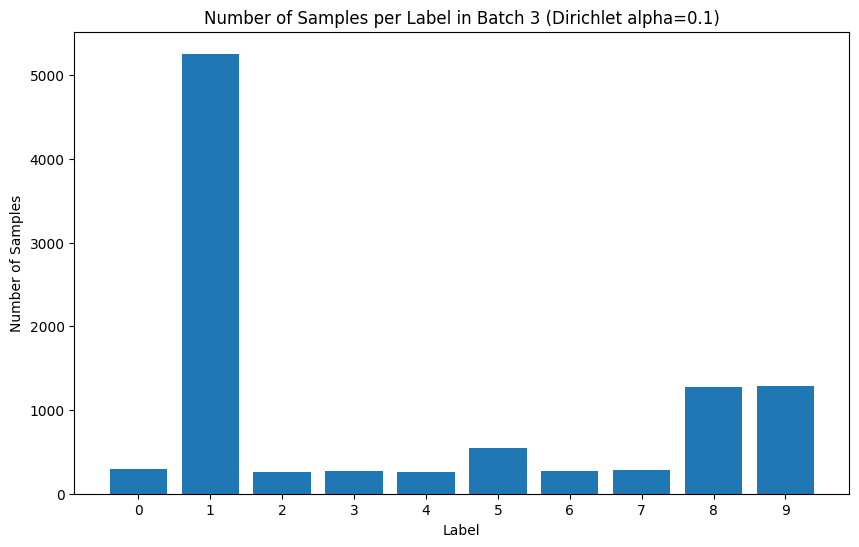

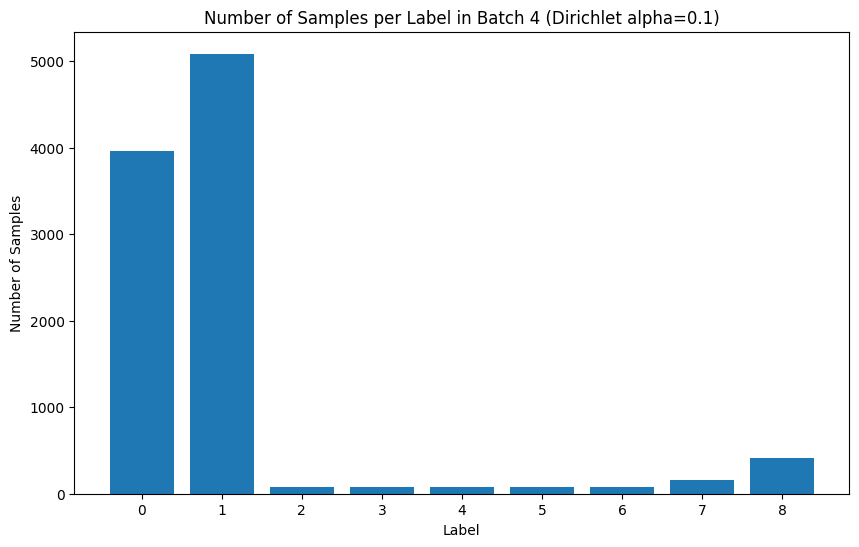

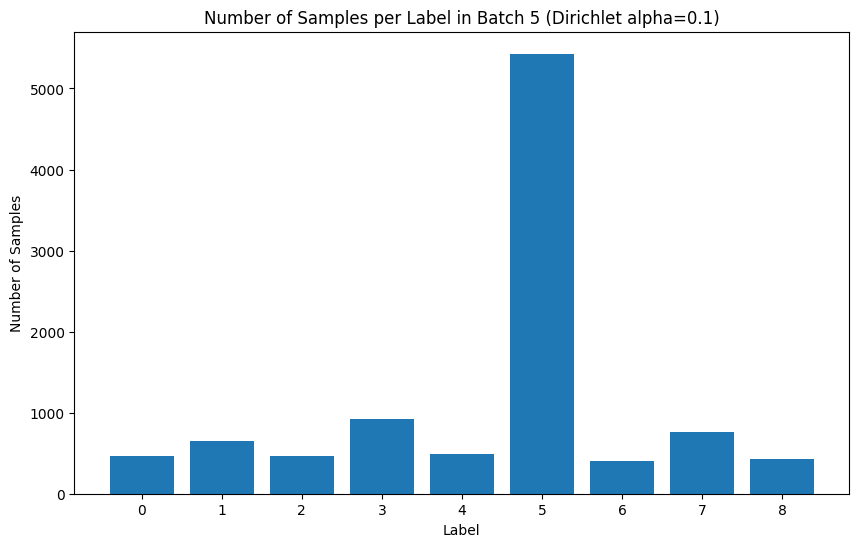

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def unpickle(file):
    """ Unpickle a CIFAR-10 batch file. """
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

def load_and_shuffle_labels(batch_files):
    """ Load CIFAR-10 data and labels, then shuffle them. """
    all_labels = []
    all_data = []
    
    for batch_file in batch_files:
        datadict = unpickle(batch_file)
        labels = datadict[b'labels']
        data = datadict[b'data']
        
        all_labels.extend(labels)
        all_data.extend(data)
    
    all_labels = np.array(all_labels)
    all_data = np.array(all_data)
    
    # Shuffle labels and data together
    all_data, all_labels = shuffle(all_data, all_labels, random_state=0)
    
    return all_data, all_labels

def create_non_iid_batches(data, labels, num_batches, num_classes, alpha):
    """ Create non-IID batches using Dirichlet distribution. """
    batch_size = len(labels) // num_batches
    non_iid_batches = []

    # Shuffle data and labels to ensure randomness
    indices = np.arange(len(labels))
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    # Prepare a list to hold indices for each batch
    indices_for_batches = [[] for _ in range(num_batches)]

    # Dirichlet distribution for class proportions in each batch
    for i in range(num_batches):
        proportions = np.random.dirichlet(np.repeat(alpha, num_classes))
        num_samples = np.floor(proportions * batch_size).astype(int)
        
        # Ensure we have enough samples of each class
        class_counts = np.zeros(num_classes, dtype=int)
        for cls in range(num_classes):
            cls_indices = np.where(labels == cls)[0]
            np.random.shuffle(cls_indices)
            needed = num_samples[cls]
            available = len(cls_indices)
            if needed > available:
                needed = available
            indices_for_batches[i].extend(cls_indices[:needed])
            class_counts[cls] = needed
        
        # Ensure we reach batch_size, if needed append some random samples
        current_batch_size = len(indices_for_batches[i])
        if current_batch_size < batch_size:
            extra_indices = np.random.choice(np.where(labels != cls)[0], 
                                             batch_size - current_batch_size, 
                                             replace=False)
            indices_for_batches[i].extend(extra_indices)
    
    # Assign data and labels to batches
    for batch_indices in indices_for_batches:
        np.random.shuffle(batch_indices)
        batch_data = data[batch_indices]
        batch_labels = labels[batch_indices]
        non_iid_batches.append((batch_data, batch_labels))
        
        # Check if the batch size matches
        if len(batch_data) != batch_size:
            print(f"Batch size mismatch: {len(batch_data)} != {batch_size}")
    
    return non_iid_batches

# Set batch file names
batch_files = [
    "cifar-10-batches-py/data_batch_1",
    "cifar-10-batches-py/data_batch_2",
    "cifar-10-batches-py/data_batch_3",
    "cifar-10-batches-py/data_batch_4",
    "cifar-10-batches-py/data_batch_5"
]

# Load and shuffle all batches' labels and data
all_data, all_labels = load_and_shuffle_labels(batch_files)

# Set number of batches and classes
num_batches = 5
num_classes = 10
alpha = 0.1  # Dirichlet distribution parameter

# Create non-IID batches with Dirichlet distribution
non_iid_batches = create_non_iid_batches(all_data, all_labels, num_batches, num_classes, alpha)

# Plot label distribution for each batch
for i, (batch_data, batch_labels) in enumerate(non_iid_batches):
    unique, counts = np.unique(batch_labels, return_counts=True)
    label_counts = dict(zip(unique, counts))
    
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Number of Samples')
    plt.title(f'Number of Samples per Label in Batch {i + 1} (Dirichlet alpha={alpha})')
    plt.xticks(ticks=list(label_counts.keys()))
    plt.show()



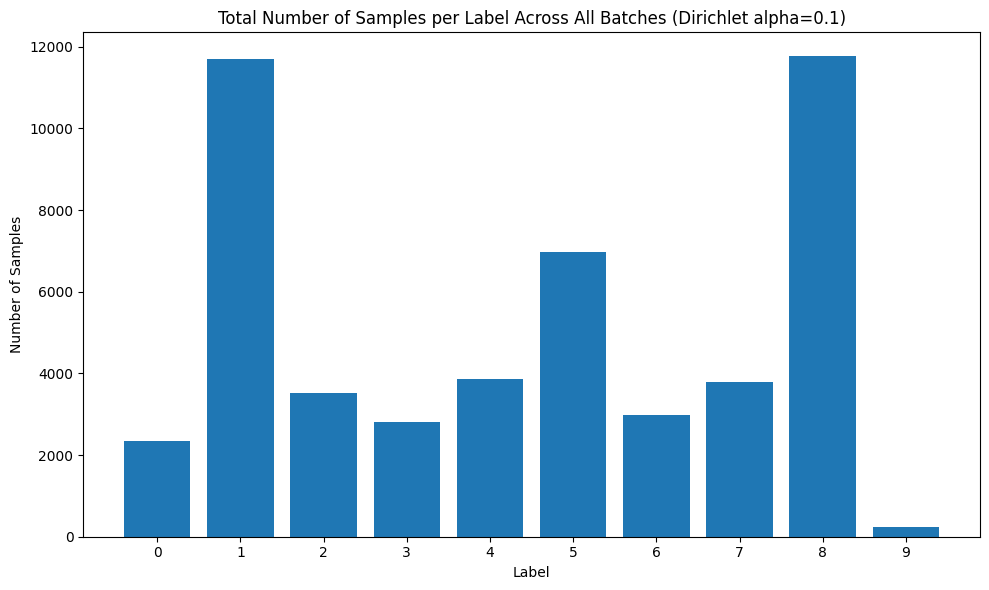

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def unpickle(file):
    """ Unpickle a CIFAR-10 batch file. """
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

def load_all_batches(batch_files):
    """ Load CIFAR-10 data and labels from all batch files. """
    all_labels = []
    all_data = []
    
    for batch_file in batch_files:
        datadict = unpickle(batch_file)
        labels = datadict[b'labels']
        data = datadict[b'data']
        
        all_labels.extend(labels)
        all_data.extend(data)
    
    all_labels = np.array(all_labels)
    all_data = np.array(all_data)
    
    return all_data, all_labels

def create_non_iid_batches(data, labels, num_batches, num_classes, alpha):
    """ Create non-IID batches using Dirichlet distribution. """
    batch_size = len(labels) // num_batches
    non_iid_batches = []

    # Shuffle data and labels to ensure randomness
    indices = np.arange(len(labels))
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    # Prepare a list to hold indices for each batch
    indices_for_batches = [[] for _ in range(num_batches)]

    # Dirichlet distribution for class proportions in each batch
    for i in range(num_batches):
        proportions = np.random.dirichlet(np.repeat(alpha, num_classes))
        num_samples = np.floor(proportions * batch_size).astype(int)
        
        # Ensure we have enough samples of each class
        class_counts = np.zeros(num_classes, dtype=int)
        for cls in range(num_classes):
            cls_indices = np.where(labels == cls)[0]
            np.random.shuffle(cls_indices)
            needed = num_samples[cls]
            available = len(cls_indices)
            if needed > available:
                needed = available
            indices_for_batches[i].extend(cls_indices[:needed])
            class_counts[cls] = needed
        
        # Ensure we reach batch_size, if needed append some random samples
        current_batch_size = len(indices_for_batches[i])
        if current_batch_size < batch_size:
            extra_indices = np.random.choice(np.where(labels != cls)[0], 
                                             batch_size - current_batch_size, 
                                             replace=False)
            indices_for_batches[i].extend(extra_indices)
    
    # Assign data and labels to batches
    for batch_indices in indices_for_batches:
        np.random.shuffle(batch_indices)
        batch_data = data[batch_indices]
        batch_labels = labels[batch_indices]
        non_iid_batches.append((batch_data, batch_labels))
        
        # Check if the batch size matches
        if len(batch_data) != batch_size:
            print(f"Batch size mismatch: {len(batch_data)} != {batch_size}")
    
    return non_iid_batches

# Set batch file names
batch_files = [
    "cifar-10-batches-py/data_batch_1",
    "cifar-10-batches-py/data_batch_2",
    "cifar-10-batches-py/data_batch_3",
    "cifar-10-batches-py/data_batch_4",
    "cifar-10-batches-py/data_batch_5"
]

# Load and shuffle all batches' labels and data
all_data, all_labels = load_all_batches(batch_files)

# Set number of batches and classes
num_batches = 5
num_classes = 10
alpha = 0.1  # Dirichlet distribution parameter

# Create non-IID batches with Dirichlet distribution
non_iid_batches = create_non_iid_batches(all_data, all_labels, num_batches, num_classes, alpha)

# Initialize a dictionary to accumulate label counts across all batches
total_label_counts = np.zeros(num_classes, dtype=int)

# Accumulate label counts from each batch
for _, batch_labels in non_iid_batches:
    unique, counts = np.unique(batch_labels, return_counts=True)
    for cls, count in zip(unique, counts):
        total_label_counts[cls] += count

# Plot the accumulated label distribution
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_classes), total_label_counts)
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title(f'Total Number of Samples per Label Across All Batches (Dirichlet alpha={alpha})')
plt.xticks(ticks=np.arange(num_classes))
#plt.grid(axis='y')
plt.tight_layout()
plt.show()


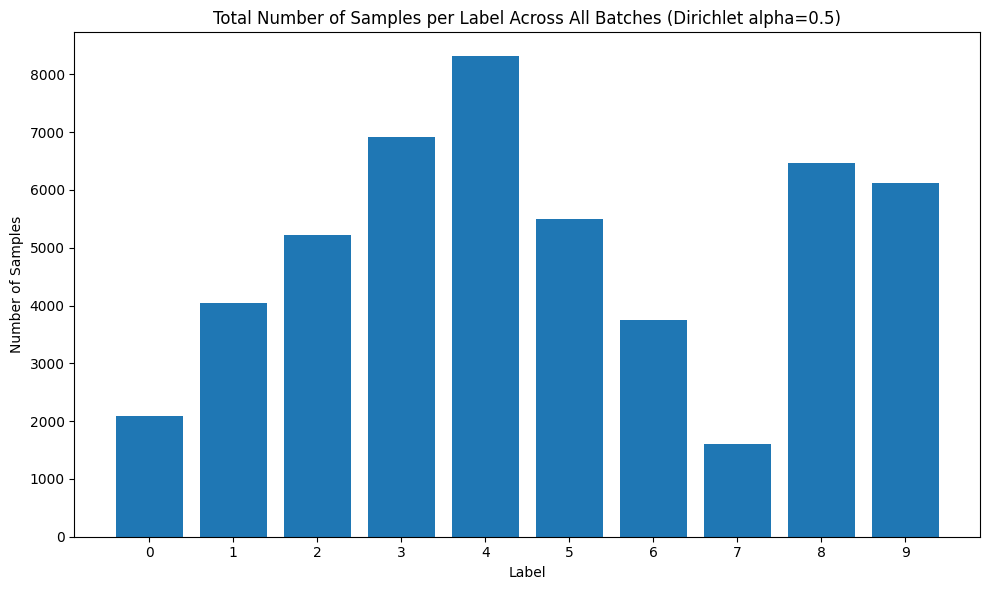

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def unpickle(file):
    """ Unpickle a CIFAR-10 batch file. """
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

def load_all_batches(batch_files):
    """ Load CIFAR-10 data and labels from all batch files. """
    all_labels = []
    all_data = []
    
    for batch_file in batch_files:
        datadict = unpickle(batch_file)
        labels = datadict[b'labels']
        data = datadict[b'data']
        
        all_labels.extend(labels)
        all_data.extend(data)
    
    all_labels = np.array(all_labels)
    all_data = np.array(all_data)
    
    return all_data, all_labels

def create_non_iid_batches(data, labels, num_batches, num_classes, alpha):
    """ Create non-IID batches using Dirichlet distribution. """
    batch_size = len(labels) // num_batches
    non_iid_batches = []

    # Shuffle data and labels to ensure randomness
    indices = np.arange(len(labels))
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    # Prepare a list to hold indices for each batch
    indices_for_batches = [[] for _ in range(num_batches)]

    # Dirichlet distribution for class proportions in each batch
    for i in range(num_batches):
        proportions = np.random.dirichlet(np.repeat(alpha, num_classes))
        num_samples = np.floor(proportions * batch_size).astype(int)
        
        # Ensure we have enough samples of each class
        class_counts = np.zeros(num_classes, dtype=int)
        for cls in range(num_classes):
            cls_indices = np.where(labels == cls)[0]
            np.random.shuffle(cls_indices)
            needed = num_samples[cls]
            available = len(cls_indices)
            if needed > available:
                needed = available
            indices_for_batches[i].extend(cls_indices[:needed])
            class_counts[cls] = needed
        
        # Ensure we reach batch_size, if needed append some random samples
        current_batch_size = len(indices_for_batches[i])
        if current_batch_size < batch_size:
            extra_indices = np.random.choice(np.where(labels != cls)[0], 
                                             batch_size - current_batch_size, 
                                             replace=False)
            indices_for_batches[i].extend(extra_indices)
    
    # Assign data and labels to batches
    for batch_indices in indices_for_batches:
        np.random.shuffle(batch_indices)
        batch_data = data[batch_indices]
        batch_labels = labels[batch_indices]
        non_iid_batches.append((batch_data, batch_labels))
        
        # Check if the batch size matches
        if len(batch_data) != batch_size:
            print(f"Batch size mismatch: {len(batch_data)} != {batch_size}")
    
    return non_iid_batches

# Set batch file names
batch_files = [
    "cifar-10-batches-py/data_batch_1",
    "cifar-10-batches-py/data_batch_2",
    "cifar-10-batches-py/data_batch_3",
    "cifar-10-batches-py/data_batch_4",
    "cifar-10-batches-py/data_batch_5"
]

# Load and shuffle all batches' labels and data
all_data, all_labels = load_all_batches(batch_files)

# Set number of batches and classes
num_batches = 5
num_classes = 10
alpha = 0.5  # Dirichlet distribution parameter

# Create non-IID batches with Dirichlet distribution
non_iid_batches = create_non_iid_batches(all_data, all_labels, num_batches, num_classes, alpha)

# Initialize a dictionary to accumulate label counts across all batches
total_label_counts = np.zeros(num_classes, dtype=int)

# Accumulate label counts from each batch
for _, batch_labels in non_iid_batches:
    unique, counts = np.unique(batch_labels, return_counts=True)
    for cls, count in zip(unique, counts):
        total_label_counts[cls] += count

# Plot the accumulated label distribution
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_classes), total_label_counts)
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title(f'Total Number of Samples per Label Across All Batches (Dirichlet alpha={alpha})')
plt.xticks(ticks=np.arange(num_classes))
#plt.grid(axis='y')
plt.tight_layout()
plt.show()